In [1]:
# import dependencies
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time module.
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress




In [2]:
# create a list of latitudes and Longitudes and zip them
lat=np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lat,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-5.1137396986117665, 77.86423291842709),
 (-88.49532452894594, 114.25193007354721),
 (16.919746906298812, -122.6100599961367),
 (74.64532048359553, -145.99847207970308),
 (38.57129704546884, 1.0572679509732268),
 (39.10105043055549, -114.85298341412616),
 (41.79697941721747, -4.066280065385342),
 (-18.710237459393696, 35.58102860296708),
 (24.81355181099724, 66.23994292472815),
 (5.231157628047555, 58.389224980286656),
 (-40.30657131845443, 39.47842764929706),
 (8.70022988214096, 127.25184690239786),
 (3.0181666594465923, 128.8262792286912),
 (21.72960540319508, 56.15051952310543),
 (43.46426200399401, -38.97679968234752),
 (86.51977900360305, -16.735132731469065),
 (-89.26610905673682, -159.79356376487686),
 (-36.16378327731649, 59.645413327433346),
 (-70.62734894552649, -111.27306808868737),
 (-43.89018697440224, 34.4249891568293),
 (69.0812808618549, -152.79424960394175),
 (-86.09659672252394, -48.63327473122146),
 (5.931460144471316, -146.58994950217493),
 (-75.1091283004686, 25.

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
cities

['hithadhoo',
 'albany',
 'constitucion',
 'college',
 'santa eulalia del rio',
 'west wendover',
 'aranda de duero',
 'dondo',
 'karachi',
 'bandarbeyla',
 'margate',
 'marihatag',
 'ternate',
 'nizwa',
 'ribeira grande',
 'illoqqortoormiut',
 'mataura',
 'saint-philippe',
 'punta arenas',
 'east london',
 'barrow',
 'ushuaia',
 'hilo',
 'bredasdorp',
 'puerto escondido',
 'barbastro',
 'gosainganj',
 'kaitangata',
 'busselton',
 'colares',
 'san patricio',
 'port alfred',
 'faya',
 'nizhneyansk',
 'kavieng',
 'hamadan',
 'mnogovershinnyy',
 'jamestown',
 'taolanaro',
 'dikson',
 'kodiak',
 'victoria',
 'soyo',
 'olinda',
 'atuona',
 'thompson',
 'dzaoudzi',
 'sterling',
 'ewa beach',
 'komsomolskiy',
 'georgetown',
 'cape town',
 'farafangana',
 'quatre cocos',
 'kruisfontein',
 'rikitea',
 'bardiyah',
 'tsihombe',
 'new norfolk',
 'souillac',
 'luderitz',
 'beckley',
 'siocon',
 'avarua',
 'deputatskiy',
 'hobart',
 'ponta do sol',
 'gazli',
 'urzhum',
 'moerai',
 'manggar',
 'iniri

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)# Starting URL for Weather Map API Call.

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0321ca41a7cfb548ec58b2953f7ca66


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | santa eulalia del rio
City not found. Skipping...
Processing Record 6 of Set 1 | west wendover
Processing Record 7 of Set 1 | aranda de duero
Processing Record 8 of Set 1 | dondo
Processing Record 9 of Set 1 | karachi
Processing Record 10 of Set 1 | bandarbeyla
Processing Record 11 of Set 1 | margate
Processing Record 12 of Set 1 | marihatag
Processing Record 13 of Set 1 | ternate
Processing Record 14 of Set 1 | nizwa
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | ushuaia
Proces

Processing Record 36 of Set 4 | rafraf
Processing Record 37 of Set 4 | ngerengere
Processing Record 38 of Set 4 | novoanninskiy
Processing Record 39 of Set 4 | tuktoyaktuk
Processing Record 40 of Set 4 | bengkulu
Processing Record 41 of Set 4 | esperance
Processing Record 42 of Set 4 | vila velha
Processing Record 43 of Set 4 | te anau
Processing Record 44 of Set 4 | port augusta
Processing Record 45 of Set 4 | sinegorye
Processing Record 46 of Set 4 | fukue
Processing Record 47 of Set 4 | dubbo
Processing Record 48 of Set 4 | madawaska
Processing Record 49 of Set 4 | mouzakion
City not found. Skipping...
Processing Record 50 of Set 4 | huangmei
Processing Record 1 of Set 5 | sayansk
Processing Record 2 of Set 5 | san nicolas
Processing Record 3 of Set 5 | ninghai
Processing Record 4 of Set 5 | nemuro
Processing Record 5 of Set 5 | ahipara
Processing Record 6 of Set 5 | kalangala
Processing Record 7 of Set 5 | diu
Processing Record 8 of Set 5 | antsohihy
Processing Record 9 of Set 5 | 

Processing Record 28 of Set 8 | fortuna
Processing Record 29 of Set 8 | vestmannaeyjar
Processing Record 30 of Set 8 | meerzorg
City not found. Skipping...
Processing Record 31 of Set 8 | kahului
Processing Record 32 of Set 8 | clyde river
Processing Record 33 of Set 8 | newry
Processing Record 34 of Set 8 | novobiryusinskiy
Processing Record 35 of Set 8 | brae
Processing Record 36 of Set 8 | krasnoselkup
Processing Record 37 of Set 8 | cabo san lucas
Processing Record 38 of Set 8 | auki
Processing Record 39 of Set 8 | imbituba
Processing Record 40 of Set 8 | grindavik
Processing Record 41 of Set 8 | kabin buri
Processing Record 42 of Set 8 | asayita
City not found. Skipping...
Processing Record 43 of Set 8 | gweru
Processing Record 44 of Set 8 | oxelosund
Processing Record 45 of Set 8 | narsaq
Processing Record 46 of Set 8 | ramanuj ganj
Processing Record 47 of Set 8 | srednekolymsk
Processing Record 48 of Set 8 | kinsale
Processing Record 49 of Set 8 | ambilobe
Processing Record 50 o

Processing Record 17 of Set 12 | san carlos de bariloche
Processing Record 18 of Set 12 | mandurah
Processing Record 19 of Set 12 | yorosso
Processing Record 20 of Set 12 | nishihara
Processing Record 21 of Set 12 | baoqing
Processing Record 22 of Set 12 | karakol
Processing Record 23 of Set 12 | soure
Processing Record 24 of Set 12 | kropotkin
Processing Record 25 of Set 12 | nouadhibou
Processing Record 26 of Set 12 | canmore
Processing Record 27 of Set 12 | balaytigui
City not found. Skipping...
Processing Record 28 of Set 12 | salamiyah
Processing Record 29 of Set 12 | okhotsk
Processing Record 30 of Set 12 | benguela
Processing Record 31 of Set 12 | bria
Processing Record 32 of Set 12 | viligili
City not found. Skipping...
Processing Record 33 of Set 12 | kalya
Processing Record 34 of Set 12 | kiunga
Processing Record 35 of Set 12 | kaoma
Processing Record 36 of Set 12 | iroquois falls
Processing Record 37 of Set 12 | ketchikan
Processing Record 38 of Set 12 | shar
Processing Reco

In [10]:
# Lenght of City Data dictionary
len(city_data)

552

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.60,73.08,82.15,81,89,14.03,MV,2020-02-22 20:40:19
1,Albany,42.60,-73.97,44.01,33,20,10.29,US,2020-02-22 20:40:18
2,Constitucion,-35.33,-72.42,62.53,72,0,6.11,CL,2020-02-22 20:42:38
3,College,64.86,-147.80,10.99,84,90,8.05,US,2020-02-22 20:42:38
4,West Wendover,40.74,-114.07,39.20,48,1,5.82,US,2020-02-22 20:42:39


In [12]:
city_data_df=city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2020-02-22 20:40:19,-0.60,73.08,82.15,81,89,14.03
1,Albany,US,2020-02-22 20:40:18,42.60,-73.97,44.01,33,20,10.29
2,Constitucion,CL,2020-02-22 20:42:38,-35.33,-72.42,62.53,72,0,6.11
3,College,US,2020-02-22 20:42:38,64.86,-147.80,10.99,84,90,8.05
4,West Wendover,US,2020-02-22 20:42:39,40.74,-114.07,39.20,48,1,5.82


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Get today's date in seconds.
#today = time.time()
today=time.strftime("%x")
today

'02/22/20'

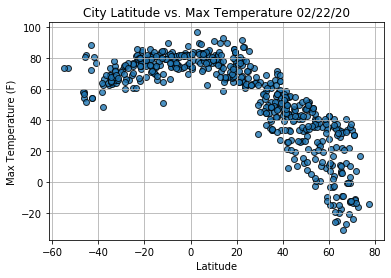

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

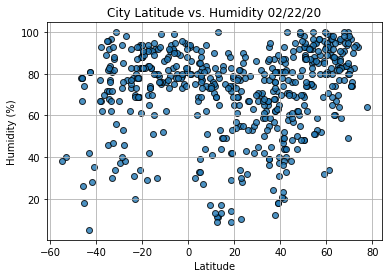

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

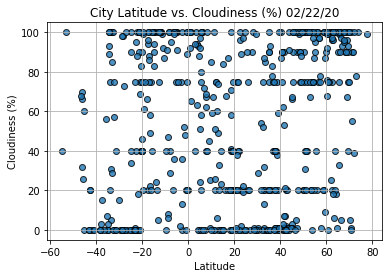

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

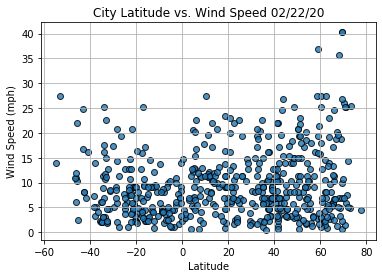

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [21]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        552 non-null    object 
 1   Country     552 non-null    object 
 2   Date        552 non-null    object 
 3   Lat         552 non-null    float64
 4   Lng         552 non-null    float64
 5   Max Temp    552 non-null    float64
 6   Humidity    552 non-null    int64  
 7   Cloudiness  552 non-null    int64  
 8   Wind Speed  552 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 38.9+ KB


In [22]:
index13=city_data_df.loc[13]
index13

City               Ribeira Grande
Country                        PT
Date          2020-02-22 20:38:14
Lat                         38.52
Lng                         -28.7
Max Temp                       59
Humidity                       72
Cloudiness                     75
Wind Speed                   5.82
Name: 13, dtype: object

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [24]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Albany,US,2020-02-22 20:40:18,42.60,-73.97,44.01,33,20,10.29
3,College,US,2020-02-22 20:42:38,64.86,-147.80,10.99,84,90,8.05
4,West Wendover,US,2020-02-22 20:42:39,40.74,-114.07,39.20,48,1,5.82
5,Aranda De Duero,ES,2020-02-22 20:42:39,41.67,-3.69,45.30,52,53,1.25
7,Karachi,PK,2020-02-22 20:41:13,24.91,67.08,71.60,43,0,6.93


In [25]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2020-02-22 20:40:19,-0.60,73.08,82.15,81,89,14.03
2,Constitucion,CL,2020-02-22 20:42:38,-35.33,-72.42,62.53,72,0,6.11
6,Dondo,MZ,2020-02-22 20:42:39,-19.61,34.74,76.98,90,99,3.91
14,Mataura,NZ,2020-02-22 20:40:19,-46.19,168.86,57.99,78,70,11.01
15,Saint-Philippe,RE,2020-02-22 20:41:32,-21.36,55.77,75.20,69,100,4.70


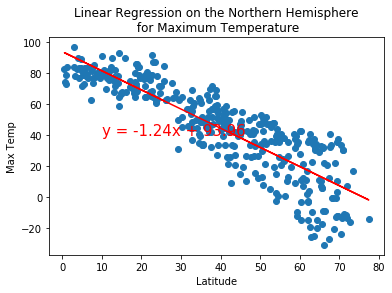

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere\n for Maximum Temperature", 'Max Temp',(10,40))

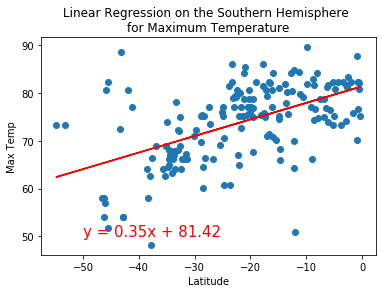

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,50))

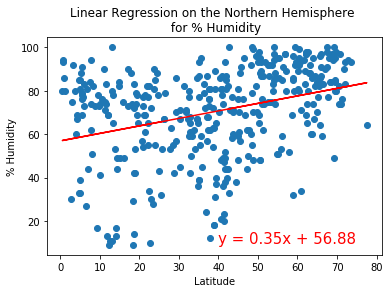

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

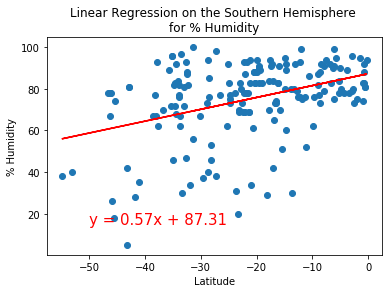

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

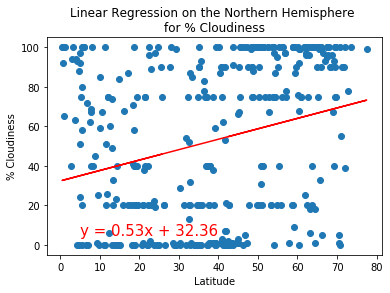

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(5,5))

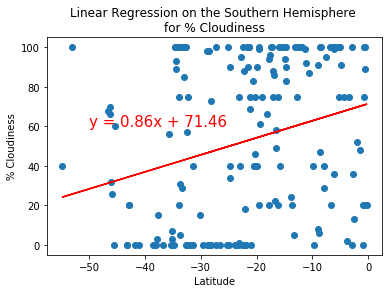

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

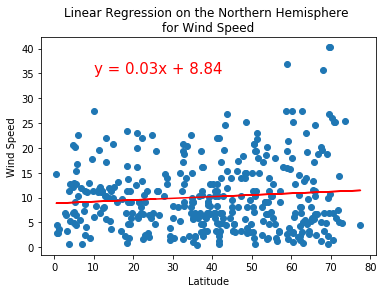

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(10,35))

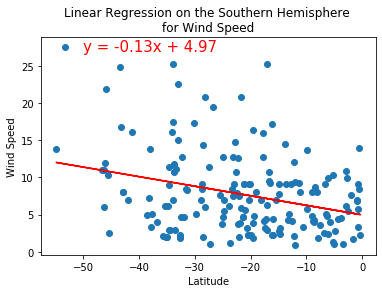

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,27))